# Lecture 9 Recursion

**Learning Objectives**: 
* Understand the concept of recursion, including base and recursive cases
* Write recursive functions in Python
* Review basic graph and tree terminology
* Implement recursive BST operations: insertion, search, and height

What is Recursion?
* A function calls itself to solve a smaller part of the problem.

Components of a Recursive Function
* **Base Case**: The stopping condition; without it, recursion continues indefinitely.
* **Recursive Case**: The function calls itself, reducing the problem size each time.

### Factorial

$n! = n \times (n-1) \times (n-2) \times \cdots \times 2 \times 1$

* **Base Case**: $0! = 1$
* **Recursive Case**: $n! = n \times (n-1)!$

In [1]:
def factorial(n): 
    # Base case
    if n == 0:
        return 1  
    # Recursive case
    return n * factorial(n - 1)  

In [2]:
factorial(0)

1

In [3]:
factorial(1)

1

In [4]:
factorial(5)

120

In [5]:
# RecursionError
def bad(n): 
    return bad(n) 
bad(1)

RecursionError: maximum recursion depth exceeded

### Fibonacci Sequence

* **Base Case**: $F(0)=0, F(1)=1$
* **Recursive Case**: $F(n)=F(n-1)+F(n-2)$

In [6]:
def fib(n):
    # Base case
    if n == 0: 
        return 0
    # Base case
    if n == 1: 
        return 1
    # Recursive case
    return fib(n - 1) + fib(n - 2)

In [7]:
fib(0)

0

In [8]:
fib(1)

1

In [9]:
fib(4)

3

### Grid Path Count

Count all possible paths from the top-left corner to the bottom-right corner of an m x n grid. Only moves allowed are right and down.

In [10]:
def count_paths(grid_size, position=(1, 1)): # Use tuples to keep track of positions
    m, n = grid_size
    row, col = position

    # Base Case: if at the bottom-right corner, found a path
    if row == m and col == n:
        return 1

    # Base Case: if out of bounds, no valid path
    if row > m or col > n:
        return 0

    # Recursive Case: move right or down, passing updated position tuples
    return count_paths((m, n), (row + 1, col)) + count_paths((m, n), (row, col + 1))

In [11]:
count_paths((-1, -1))

0

In [12]:
count_paths((1, 1))

1

In [13]:
count_paths((2, 2))

2

In [14]:
count_paths((3, 3))

6

In [15]:
count_paths((10, 8))

11440

### Reverse List

In [16]:
def reverse_list(lst):
    # Base Case: If the list is empty, return an empty list
    if not lst:
        return []
    
    # Recursive Case: Take the last element and append it to the reversed remainder
    return [lst[-1]] + reverse_list(lst[:-1])

In [17]:
reverse_list([])

[]

In [18]:
original_list = [1, 2, 3, 4, 5]
reverse_list(original_list)

[5, 4, 3, 2, 1]

### Flatten List

Given a nested list, return a single flattened list where all nested elements are brought to the top level.

Example: `[1, [2, [3, 4], 5], 6]` => `[1, 2, 3, 4, 5, 6]`

In [19]:
def flatten_list(nested_list):
    # Base Case: If the list is empty, return an empty list
    if not nested_list:
        return []
    
    # Recursive Case: Check the first element
    first, rest = nested_list[0], nested_list[1:]
    
    # If first element is a list, recursively flatten it and append the flattened rest
    if isinstance(first, list):
        return flatten_list(first) + flatten_list(rest)
    else:
        # If first element is not a list, append it to the flattened rest
        return [first] + flatten_list(rest)

In [20]:
nested_list = [1, [2, [3, 4], 5], 6]
flatten_list(nested_list)

[1, 2, 3, 4, 5, 6]

# Binary Search Trees

graphviz is a graph visualization software
* Download on your OS following [this](https://graphviz.org/download/)
* Install Python package with `pip install graphviz`

You don't have to install them! Just for lecture visualization purpose. 

In [21]:
from graphviz import Digraph

Recall graph and tree terminologies:

* **graph**: a data structure consisting of a set of nodes connected by edges
* **cyclic**: contains a path starts and ends at the same node
* **root**: node with no parents
* **leaf**: node with no children

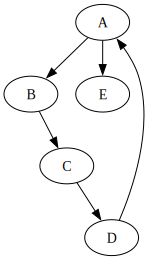

In [22]:
# cyclic
g = Digraph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "A")
g.edge("A", "E")
g
# A is a root
# E is a leaf

* **tree**: acyclic graph that
    * has only one root
    * all other nodes have only one parent
* **binary tree**: trees have at most two children

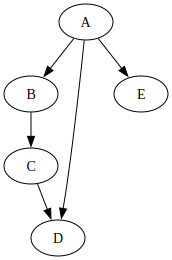

In [23]:
# not a tree
g = Digraph()
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("A", "D")
g.edge("A", "E")
g

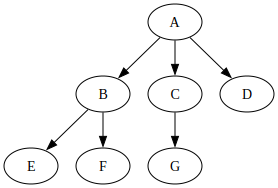

In [24]:
# tree but not binary
t = Digraph()
t.edge("A", "B")
t.edge("A", "C")
t.edge("A", "D")
t.edge("B", "E")
t.edge("B", "F")
t.edge("C", "G")

t

### BST Rule:
* All nodes in the left subtree of a given node must have values less than the node’s value
* All nodes in the right subtree of a given node must have values greater than the node’s value.

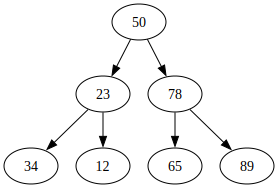

In [25]:
# binary tree but not BST
t = Digraph()
t.edge("50", "23")
t.edge("50", "78")
t.edge("23", "34")
t.edge("23", "12")
t.edge("78", "65")
t.edge("78", "89")

t

In [26]:
class BSTNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    # In-order traversal to print values 
    def print(self, prefix="", suffix=""):
        if self.left != None:
            self.left.print(prefix+"\t", "(LEFT)")
        
        print(prefix, self.value, suffix)
       
        if self.right != None:
            self.right.print(prefix+"\t", "(RIGHT)")
            
    # Search for a value in the BST
    def search(self, target):
        if target == self.value:
            return True
        elif target < self.value:
            if self.left is None:  
                return False
            else:
                return self.left.search(target)
        else:
            if self.right is None:
                return False
            else: 
                return self.right.search(target)

    # Insert a new value in the BST
    def insert(self, new_value):
        if new_value < self.value:
            if self.left is None:
                self.left = BSTNode(new_value)
            else:
                self.left.insert(new_value)
        elif new_value > self.value:
            if self.right is None:
                self.right = BSTNode(new_value)
            else:
                self.right.insert(new_value)
        else: 
            raise ValueError(f"{new_value} is already a node in the tree!")

    # Calculate the height of the tree
    def height(self):
        if self is None:
            return -1
        left_height = self.left.height() if self.left else -1
        right_height = self.right.height() if self.right else -1
        return 1 + max(left_height, right_height)

### Implement `print()`

In [27]:
node1 = BSTNode(1)
node2 = BSTNode(2)
node3 = BSTNode(3)
node4 = BSTNode(4)
node1.left = node2
node1.right = node3
node2.left = node4
node1.print()

		 4 (LEFT)
	 2 (LEFT)
 1 
	 3 (RIGHT)


Does this tree satisfy BST rule? If not, which node violates it and how can we fix its position?

In [28]:
root = BSTNode(10)
root.left = BSTNode(2)
root.left.left = BSTNode(1)
root.left.right = BSTNode(4)
root.left.right.left = BSTNode(3)
root.right = BSTNode(15)
root.right.left = BSTNode(12)
root.right.right = BSTNode(19)
root.right.left.left = BSTNode(8)
root.print()

		 1 (LEFT)
	 2 (LEFT)
			 3 (LEFT)
		 4 (RIGHT)
 10 
			 8 (LEFT)
		 12 (LEFT)
	 15 (RIGHT)
		 19 (RIGHT)


In [29]:
# Fix
root = BSTNode(10)
root.left = BSTNode(2)
root.left.left = BSTNode(1)
root.left.right = BSTNode(4)
root.left.right.right = BSTNode(8)
root.left.right.left = BSTNode(3)
root.right = BSTNode(15)
root.right.left = BSTNode(12)
root.right.right = BSTNode(19)
#root.right.left.left = BSTNode(8)
root.print()

		 1 (LEFT)
	 2 (LEFT)
			 3 (LEFT)
		 4 (RIGHT)
			 8 (RIGHT)
 10 
		 12 (LEFT)
	 15 (RIGHT)
		 19 (RIGHT)


### Implement `search()`

In [30]:
print(root.search(10)) 
print(root.search(11)) 
print(root.search(19))
print(root.search(5))  

True
False
True
False


### Implement `insert()`

In [31]:
values = [10, 2, 1, 4, 8, 3, 15, 12, 19]

root = BSTNode(values[0])
for val in values[1:]:
    root.insert(val)
    
root.print("", "(ROOT)")

		 1 (LEFT)
	 2 (LEFT)
			 3 (LEFT)
		 4 (RIGHT)
			 8 (RIGHT)
 10 (ROOT)
		 12 (LEFT)
	 15 (RIGHT)
		 19 (RIGHT)


### Implement `height()`

In [32]:
root.height()

3